# Fast-Slow系
\begin{equation}
\begin{array}{ll}
\dot{x}&=\varepsilon (y+x-\frac{x^3}{3})\\
\dot{y}&=-\frac{1}{\varepsilon}x
\end{array}
\label{fastslow_vdp}
\end{equation}

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set('poster', 'whitegrid', 'dark', rc={"lines.linewidth": 2, 'grid.linestyle': '--'})

In [2]:
def vdp(t, x, eps):
    return [eps * (x[1] + x[0] - x[0]**3/3), -x[0]/eps]

In [3]:
eps=10
t0 = 0.0

In [4]:
t1 = 100.0
x0 = [0.0, 1.5]
s0 = solve_ivp(vdp, [t0, t1], x0, args=([eps]),dense_output=True)

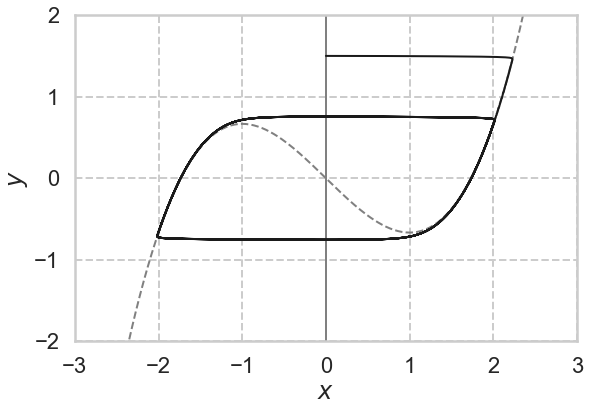

In [5]:
T = np.linspace(t0, t1, 10000)
sol = s0.sol(T)
fig = plt.figure(figsize=(9,6))

ax = fig.add_subplot(111)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_xlim(-3,3)
ax.set_ylim(-2,2)
ax.set_yticks([-2,-1,0,1,2])
X = np.linspace(-3,3,256)
ax.plot(np.zeros(2), np.linspace(-2,2,2), '-', color='gray')
ax.plot(X, -X + X**3/3, '--', color='gray')
ax.plot(sol.T[:,0], sol.T[:,1], '-k')
# plt.savefig("fastslow.pdf", bbox_inches='tight')